In [2]:
#importing libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import metrics
import numpy as np
from scipy import stats
import statsmodels.api as sm
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emrem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# importing data
os.chdir('D:/Emre Masaüstü/Python/NLP/YouTube-Spam-Collection-v1/')
data = pd.read_csv('Youtube05-Shakira.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 5 columns):
COMMENT_ID    370 non-null object
AUTHOR        370 non-null object
DATE          370 non-null object
CONTENT       370 non-null object
CLASS         370 non-null int64
dtypes: int64(1), object(4)
memory usage: 14.5+ KB


In [5]:
data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0


In [6]:
# counting null values
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
CLASS,0,0.0
CONTENT,0,0.0
DATE,0,0.0
AUTHOR,0,0.0
COMMENT_ID,0,0.0


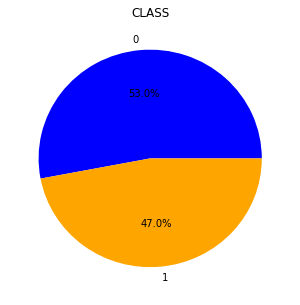

In [7]:
##########################
#EXPLORATORY DATA ANALYSIS
##########################
#TARGET 
labels = data.CLASS.value_counts().index
colors = ["blue","orange"]
explode = [0,0]
sizes = data.CLASS.value_counts().values
#visualization
plt.figure(figsize=(5,5))
plt.pie(sizes,colors=colors,explode=explode,labels=labels,autopct="%1.1f%%")
plt.title("CLASS")
plt.show()

In [8]:
data=data[['CONTENT','CLASS']]

In [10]:
y = data['CLASS']
X = data['CONTENT'].values.tolist()

In [11]:
#harfleri küçültmeyi de ekle!!!
corpus = []
for i in range(0,len(X)):
    X[i] = re.sub(r"\W"," ",X[i]) #yazı karakteri dışındakileri siler
    X[i] = re.sub(r"\d"," ",X[i]) #sayıları siler
    X[i] = re.sub(r"\s+[a-z]\s+"," ",X[i],flags=re.I)
    X[i] = re.sub(r"\s+"," ",X[i]) #boşlukları siler
    X[i] = re.sub(r"^\s","",X[i]) #baştaki boşlukları siler
    X[i] = re.sub(r"\s$","",X[i]) #sondaki boşlukları siler
    corpus.append(X)

In [12]:
X

['Nice song',
 'I love song',
 'I love song',
 'lets make it first female to reach one billion Share it and replay it',
 'shakira is best for worldcup',
 'The best world cup song ever',
 'I love',
 'SEE SOME MORE SONG OPEN GOOGLE AND TYPE Shakira GuruOfMovie',
 'Awesome',
 'I like shakira',
 'Shakira Waka Waka br LOVE THIS SONG',
 'Why so many disliked',
 'I don think this song will ever get old',
 'Love song',
 'wery good',
 'Every time hear this song think about Iniesta goal against the Netherlands',
 'Whose watching this in If so hi',
 'I love this song so much lt br Keep em coming',
 'i love this song thumsb up to you',
 'Waka best one',
 'years later still love this song br Axy',
 'Like',
 'Check out this playlist on YouTube',
 'Her voice sounds weird and plus she cute for blonde',
 'Why there are so many dislikes This song is so awesome It sounds like we MUST STOP BE RACISTS If could would like it times',
 'Nice love itttttttt wurkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk

In [13]:
#CREATING THE HISTOGRAM
word2count={}
for data in X:
    words=nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word]=1
        else:
            word2count[word]+=1
            
import heapq
freq_words=heapq.nlargest(100,word2count,key=word2count.get)

In [14]:
#IDF MATRIX
word_idfs = {}

for word in freq_words:
    doc_count = 0
    for data in X:
        if word in nltk.word_tokenize(data):
            doc_count += 1
    word_idfs[word] = np.log((len(X)/doc_count)+1)

In [15]:
#TF Matrix
tf_matrix = {}
for word in freq_words:
    doc_tf = []
    for data in X:
        frequency = 0
        for w in nltk.word_tokenize(data):
            if w == word:
                frequency += 1
        tf_word = frequency/len(nltk.tokenize(data))
        doc_tf.append(tf_word)
    tf_matrix[word] = doc_tf

TypeError: 'module' object is not callable

In [ ]:
#TF-IDF Calculation
tfidf_matrix = []
for word in tf_matrix.keys():
    tfidf = []
    for value in tf_matrix[word]:
        score = value*word_idfs[word]
        tfids.append(score)
    tfidf_matrix.append(tfidf)

In [114]:
X = np.asarray(tfidf_matrix)

In [115]:
X = np.transpose(X)

array([], dtype=float64)

In [88]:
import pickle
with open('X.pickle','wb') as f:
    pickle.dump(X,f)
with open('y.pickle','wb') as f:
    pickle.dump(y,f)

with open('X.pickle','rb') as f:
    X = pickle.load(f)
with open('y.pickle','rb') as f:
    y = pickle.load(f)

In [96]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=2000,min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus).toarray()

AttributeError: 'Series' object has no attribute 'lower'

In [97]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X = transformer.fit_transform(X).toarray()

TypeError: no supported conversion for types: (dtype('O'),)